#(Computer Vision) الفصل الاول: الرؤية الحاسوبية
في هذا الفصل من الكُتيب سوف يتم طرح بعض الخوارزميات المستخدمه من اجل معالجة الصور وبعض المكتبات المستعمله لكي ينطلق المُتعلم في طريقة نحو الاتقان وبناء خوارزمية تعلم عميق بشكل سليم



## الشبكات العصبية الترشيحية (Convolutional neural network)

ما هي الشبكة العصبية التشريحية؟ هي نوع خاص من الشبكات العصبية يمكن أن تستعمل في إيجاد الأنماط بداخل البيانات المعطاة لها.



على سبيل المثال: لو لدينا صور القرص المضغوط فيمكن تخمين الأنماط على أنها دائرة وفي المنتصف هنالك نقطة مجوفة، قد يتساءل البعض لربما تحدث مشكلة إذا تم إدخال بيانات لصور الدونات مثلا، هل سوف تتعرف عليها الخوارزمية؟ هذا الجواب عائد كيف تتعلم هذه المعمارية من الخوارزميات فبعضها يجد أن الدونات لديها سُمك بين الأطراف أكثر من القرص المضغوط وهكذا يتم التفريق بينهم.

## المواضيع التي سوف يتم طرحها ‏‪ (Topics of the section)
سوف يتم البدء في تحميل البيانات المكونة من مجموعة من الصور سوف نتناولها بأكثر من طريقه
1. تحميلها أولاً من [TensorFlow Datasets](https://www.tensorflow.org/datasets/overview)

    - اكتشاف البيانات من الداخل ورؤيتها
    - ملاحظة الفروقات لاحقاً بينها وبين البيانات الخام عند قراءتها باستعمال المكتبات الخاصة لقراءة ومعالجة الصور
2. إعداد الصور من داخل مجلدات وكيف نستطيع قراءتها وما هي الباراميترات المهمة
    - طريقه تحميل الصور من داخل المجلدات إلى الكود تحتاج إلى هيكلية معينه
سوف يتم التدرج وبناء مشروع كامل بالخطوة الأولى وبعدها سوف نبني مشروع آخر بنفس الطريقة لكن باستعمال الطريقة الثانية

## تحميل الملفات باستخدام TensorFlow Dataset
dataset قبل البدء من أهم المميزات في الـ

TensorFlow وهي شكل البيانات في مكتبه Tensors هو أنها مُعده من قبل على شكل 

وهي عبارة عن مصفوفة بكل اختصار.

وميزه أخرى, يمكننا أيضاً عمل العديد من التجارب على بيانات مُعده بشكل ممتاز وهذا يعطي نتائج مبهرة وجميلة

### (Download images) تحميل البيانات

In [ ]:
# import tensorflow dataset 
import tensorflow_datasets as tfds

In [ ]:
# List all the datasets
dataset_list = tfds.list_builders()
print(dataset_list)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

بإستعمال الدالة .list_builders()

نستطيع فرز جميع البيانات المُعدة التي تملكها المكتبه في الوقت الحالي 


البيانات العائدة تعود بصيغة List لذلك نستطيع تخزينها بداخل مُتغير 


``` 1444/1/4 ``` الوقت الذي تم كتابه الشرح فيه

In [ ]:
# Check a certain dataset
print("rock_paper_scissors" in dataset_list)

True


سوف نستعمل البيانات المُعدة التي تملك عن صور من اللعبة الشهيرة "حجرة ورقة مقص"

لقد قمت باختيارها عن طريق استعمال موقعهم الخاص الخاص بهذه المجموعة الضخمة من البيانات
[TensorFlow datasets Catalog](https://www.tensorflow.org/datasets/catalog/overview)

In [ ]:
# Load the desired dataset
(train_data, test_data), dataset_info = tfds.load(name="rock_paper_scissors",
                                                  split=["train", "test"],
                                                  shuffle_files=True,
                                                  as_supervised=True,
                                                  with_info=True)

In [ ]:
train_data.take(0)

<TakeDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

ووضع الباراميترات كالآتي .load() أولاً تم تنزيل البيانات عن طريق
- name= اسم مجموعة البيانات التي تريدها
- split: تقسيم البيانات إلى جزئين وهو التدريب والاختبار لاحقاً
    - كيف تم معرفة ما هي التقسيمة ؟ عن طريق الموقع تم وضع الجزئين
    - [in section of split](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors)
- shuffle_files: إعادة ترتيب ملفات الصور أثناء تنزيلها وهذا يفيد بشكل كبير أثناء عملية تدريب الخوارزمية لكي لا يقع المودل في مُشكله تدعى
Overfitting

- as_supervised: تحميل الملفات بصيغة Tuple => (image, label)
    - لذلك تم تقسيم المتغيرات بداخل الأقواس لكي نستخدم Tuple unpacking 
    - حيث تتقسم بالشكل التالي ( (image_train, label_train) , (image_test, label_test) ) ===> (train_data, test_data)
-with_info: تأتي مع بعض البيانات من هذه المكتبة بمعلومات عن المجموعة البياناتيه المُحملة meta data


In [ ]:
# Check the features meta
dataset_info.features

FeaturesDict({
    'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})

In [ ]:
# How to access the label for image
dataset_info.features["label"]

ClassLabel(shape=(), dtype=tf.int64, num_classes=3)

In [ ]:
# Access all the list of labels 
dataset_info.features["label"].names

['rock', 'paper', 'scissors']

للحصول على أسماء كل كلاس موجودة في هذه الحزمة من البيانات نستطيع استعمال بيانات الميتا ونستعملها عليها الآتي:
- .features: تحتوي على المفتاح المؤدي إلى أسماء الكلاسات Dictionary تقوم بإرجاع
- features["label"]: نقوم بإدخال اسم المفتاح KEY
- .names: باستعمال العنصر هذا نستطيع الولوج إلى أسماء الكلاسات

سؤال: لماذا نريد معرفة أسماء الكلاسات وتخزينها للاستخدام لاحقاً ؟


جواب: عندما تقوم خوارزمية التعلم العميق في تصنيف البيانات تحتاج إلى مُخرج تعرفه الخوارزمية في هذه الحالة تعطى أسماء المخرجات إلى الخوارزمية لكي تستطيع تصنيفها.


In [ ]:
# Store the list of labels into variable for future use
class_names = dataset_info.features["label"].names
class_names

['rock', 'paper', 'scissors']

### (EDA) استكشاف البيانات

In [ ]:
# Small EDA for image features
for image, label in train_data.take(1):
    print(f"Image Shape: {image.shape}")
    print(f"Image Data Type: {image.dtype}")
    print(f"Image Label (in number): {label}")
    print(f"Image Label (in String 'real name'): {class_names[label.numpy()]}")
    print(f"Image Matrix: {image}")

Image Shape: (300, 300, 3)
Image Data Type: <dtype: 'uint8'>
Image Label (in number): 2
Image Label (in String 'real name'): scissors
Image Matrix: [[[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [253 253 253]
  ...
  [250 250 250]
  [251 251 251]
  [249 249 249]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [252 252 252]]

 ...

 [[252 252 252]
  [251 251 251]
  [252 252 252]
  ...
  [247 247 247]
  [249 249 249]
  [248 248 248]]

 [[253 253 253]
  [253 253 253]
  [251 251 251]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [248 248 248]
  [247 247 247]
  [250 250 250]]]


من الجيد كأول خطوة عند تحميل أي بيانات، أخذ بعض الوقت لمشاهدة أحجام الصور أو نوع البيانات ومشاهده هل المصفوفة تحتوي على بيانات تم تحسين أرقامها بصيغة 0-1 بدل من أن تبدأ الأرقام من 0-255 وهذا راجع لكون الباش عندما نقوم باستعماله يجب أن تكون جميع البيانات بنفس البُعد لو كانت مثلاً
(3 ,300 ,300) فجميعها يجب أن تكون هكذا

- أول رقم يمثل الارتفاع
- ثاني رقم يمثل العرض
- ثالث رقم يمثل عدد قنوات الألوان وهي الأحمر والأخضر والأزرق
حسب تجاربي السابقة في بناء هذه الخوارزمية وتدريبها.
الشبكة العصبية تعمل بشكل أكبر كفاءة مع بيانات من نوع float32

وأيضاً نلاحظ ان الكلاسات عباره عن أرقام integers
[1,2,3,4]

وليست OneHot [0, 1, 0]
- الرقم واحد يشير عن هذه الصوره تنتمي للكلاس هذا مثلاً نقول هو الحجر بالمصفوفه التي بالبايثون 

### (Preprocess images) معالجة البيانات
من أجل الحصول على أفضل نتيجة ممكنة خلال تدريب خوارزمية الشبكة العصبية التشريحية تُعتبر من أهم الخطوات في بناء أي موديل هو تجهيز البيانات بالشكل الملائم

In [ ]:
# importing the TensorFlow library
import tensorflow as tf

In [ ]:
def process_img(image, label, img_shape=224):
    """ 
    Convert image dtype from uint8 ===> float32
    also reshape the images to (224, 224, 3) by default unless you want to specify a number you want.

    --------------
    Args:
    image: image in tensor (matrix)
    label: classes in number format
    image_shape: the shape of image you want 

    --------------
    Returns: 
    Tuple of casted Image matrix of type float32 and the label with it in the form of (image, label)
    """
    img = tf.image.resize(image, [img_shape, img_shape])
    img = img /255.
    return tf.cast(img, tf.float32), label

في هذه الخطوة:
لقد قمنا بعمل دالة تقوم بعمل الآتي تأخذ الصور كصيغة مصفوفة وأيضاً تأخذ الكلاسات بصيغة رقمية وتحولها الى

```( (224, 224, 3), الكلاس )```

وأيضا حولنا جميع قيم المصفوفه إلى قيم بين 0 - 1 لكي تستطيع الخوارزمية أن تتنبأ بشكل ممتاز عكس إذا كانت القيم بين 0 - 255

سؤال: من أين أتت الأقواس الزائده التي بالخارج تحيط بالكلاس ومصفوفة الصورة ؟

الجواب: عند إرجاع قيم من دالة مع وضع فاصلة بين مُتغيرين في البايثون فإنه سيتم إرجاعه كـصيغة 

*Tuple*

![](https://i.imgur.com/cGQCpQG.png)

*Tupleصورة توضيحية وضع الفاصله هنا يسبب في ارجاع القيم كـ*

In [ ]:
# Preprocess the images & Batch it
train_data = train_data.map(map_func=process_img, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE)

test_data = test_data.map(map_func=process_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

الكثير من العمليات حدثت هنا لكنها بسيطة وسوف تشرح كالتالي:
- .map(): تعمل بإرسال اجزاء من البيانات هنا الى داله اخرى وهي التي كتبناها في الاعلى سابقاً ويتم تحويل جزء البيانات فلنقل المصفوفه الاولى وتعود لنا بصيغتها الجديدة التي قمنا بتحديدها سلفًا
- num_parallel_calls: هنا قمنا بعمل Parallel Processing لتسريع عملية المعالجة تخيل معي انك تقوم بأكثر من عملية في وقت واحد من غير انتظار العملية الاولى لكي تنتظر وتبدأ العملية التاليه فهذا يكسبنا الوقت في البيانات الضخمة.
- .batch(): تجميع البيانات في حزمه لكي تتيح للموديل ان يرى فقط هذه الجزئيه وعددها 32 بمعنى انه يرى في المره الواحده 32 جزئيه من البيانات بدل البيانات جميعها في آن واحد 

- .prefetch(): تستخدم في تسريع ايضاً عملية رفع البيانات عندما تبدأ عملية تدريب الخوارزمية
    - ملاحظة: يمكنك اكمال الخطوات من غيرها, لكن يفضل وضعها في اخر شيء من الـ input pipeline


### (Building CNN model) بناء الخوارزمية الخاصة بـالشبكة العصبية الترشيحية

قبل البدأ في استعمال وبناء معمارية CNN

وهي نوع خاص من الشبكات العصبية الترشيحية الموجودة في مكتبه Conv2D سوف يتم إستعمال

TensorFlow

---


Shape علينا اولاً معرفه ماهو الـ

شكل المدخل وكم بُعد يحتاج هل استوفينا شروطه ؟

Conv2D شكل المدخل في :

```batch_shape + (rows, cols, channels)```

المصدر: [https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

In [ ]:
# inspect the object of prefetch
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

shape=(None, 224, 224, 3) كما نرى ماهو مكتوب 

هذا يدل ان حجم الصوره موجود الا وهو اخر 3 ارقام كما شرحت في السابق, ولكن هنالك 
شيء إضافي هنا وهو

```None```
المعنى انه تم حجز خانه للـ Batch size

وهي التي عملناها في الخطوات السابقه عندما حددنا عددها وهو 32

- None: خاصه بالمودل يعتمدها كـفراغ إلى ان يأتي وقت التدريب ويملؤها بالرقم 32



In [ ]:
# Build the Sequential Stacking
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


لبناء معمارية شبكة عصبية هنالك طرق لبنائها إما عن طريق 
- Sequential (سوف نستعمل هذه)
- Functional API (مرنه أكثر)

لقد استعملنا في بناء هذه الخوارزمية طبقتين من Conv2D
- وظيفتها استخراج الانماط المهمة في الصورة وإيجاد أهم القيم التي تساعد في جعل عملية تصنيف الصور لاحقاً
    - filters: كم عدد الخلايا التي تستخرج من خلالها القيم في الصورة 
    - kernel_size: هو عدد البكسلات التي تملكها باراميتر Filters
        - بمعنى لو وضعنا رقم 3 معناها كل فلتر سوف يملك 3*3 بكسل ويتحرك ويستخرج القيم المهمة في الصورة
    - activation: وهي عمليات حسابية تحدث على الانماط المستخرجة ومشكلتنا هنا تمثل Non-linear بمعنى انها مشكله غير خطية  وهذه الصورة

GlobalMaxPooling2D:
- تقوم بتقليل عدد الابعاد للمصفوفات المرجعة من الطبقات التي جاءت من الأعلى المعمارية

Dense:
- وهو طبقة عصبية تستخدم لتعلم الانماط لكن في الاعلى استعملت كأخر طبقة وهي طبقة المخرجات


model.compile():
- loss: لتحديد أي هامش خطأ نرجع للمشكله التي نريد حلها ونفكر قليلاً هل هي من ضمن أكثر من كلاس للتصنيف ؟ ام انها فقط تملك كلاسين ونحاول التفريق بينهم.
    - بصيغة ابسط: هي الدالة التي تخبر الخوارزمية إلى أي مدى التنبؤ الخاص بها خاطئ
    - sparse_categorical_crossentropy: وضعناها بسبب ان الكلاسات على صيغة integers
        - integers: بمعنى [1,2,3]
        - OneHot: تكون شكلها هكذا [0,0,1]
        - categorical_crossentropy معلومة إضافية: لو كانت بصيغة الوان هوت نستطيع إستخدام 


- optimizer: لتحديد الدالة التي تستطيع من خلالها تحسين إيجاد الانماط في البيانات أثناء عملية التمرين
    - اشهر الدوال Adam()

- metrics: تحديد وتفسير أداء الخوارزمية هل النتائج مرضية أم تحتاج إلى تحسين ؟



### (Model training) البدء في عملية تدريب الخوارزمية
لكي نستطيع تدريب الخوارزمية نقوم بإستدعاء الداله .fit()

ملاحظة: هذه الداله أيضاً تقوم بإرجاع معلومات عن المقاييس يمكن الاستفاده منها لاحقاً في إنشاء رسومات بيانيه

ماهي الباراميترات المستخدمة ؟ 
- yولأننا دمجناها في مُتغير واحد سابقاً لذلك لانحتاج لمُتغير (X, y)أول خانه: وهي تأخذ بيانات الـ 
- Epochs: هو عدد مرات مشاهدة الخوارزمية للبيانات اثناء التدريب للدورة الواحدة
    - على سبيل المثال لو لدينا 10 ألاف شريحة من البيانات ووضعنا 10 دورات هذا يعني انها سوف ترى الـ 10 ألاف 10 مرات
- validation_data: هي نفس أول باراميتر في الخانه1 

In [ ]:
# Train the model for features extraction
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)

Epoch 1/10
79/79 [==============================] - 22s 112ms/step - loss: 1.0509 - accuracy: 0.4996 - val_loss: 1.1098 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - 8s 101ms/step - loss: 0.9284 - accuracy: 0.6060 - val_loss: 1.0557 - val_accuracy: 0.3763
Epoch 3/10
79/79 [==============================] - 8s 100ms/step - loss: 0.8068 - accuracy: 0.6591 - val_loss: 0.9941 - val_accuracy: 0.4355
Epoch 4/10
79/79 [==============================] - 8s 101ms/step - loss: 0.7284 - accuracy: 0.6841 - val_loss: 0.9525 - val_accuracy: 0.4892
Epoch 5/10
79/79 [==============================] - 8s 107ms/step - loss: 0.6700 - accuracy: 0.7107 - val_loss: 0.9186 - val_accuracy: 0.5188
Epoch 6/10
79/79 [==============================] - 8s 101ms/step - loss: 0.6145 - accuracy: 0.7452 - val_loss: 0.8669 - val_accuracy: 0.5484
Epoch 7/10
79/79 [==============================] - 8s 101ms/step - loss: 0.5622 - accuracy: 0.7762 - val_loss: 0.8205 - val_accuracy: 0.5995
Epoch

In [ ]:
history.history

{'accuracy': [0.49960318207740784,
  0.6059523820877075,
  0.6591269969940186,
  0.6841269731521606,
  0.7107142806053162,
  0.7452380657196045,
  0.776190459728241,
  0.807539701461792,
  0.8341270089149475,
  0.8595238327980042],
 'loss': [1.0508699417114258,
  0.9283791184425354,
  0.806816577911377,
  0.7283884286880493,
  0.6699739694595337,
  0.6145328879356384,
  0.5621534585952759,
  0.5090625882148743,
  0.457501083612442,
  0.41296741366386414],
 'val_accuracy': [0.3333333432674408,
  0.37634408473968506,
  0.4354838728904724,
  0.48924732208251953,
  0.5188171863555908,
  0.5483871102333069,
  0.5994623899459839,
  0.6397849321365356,
  0.6801075339317322,
  0.6774193644523621],
 'val_loss': [1.1097803115844727,
  1.0557432174682617,
  0.9941222667694092,
  0.9524931311607361,
  0.9186267852783203,
  0.8669115304946899,
  0.82050621509552,
  0.7490584850311279,
  0.7057470679283142,
  0.6854193210601807]}

هنا لو اخذنا الاوبجكت العائد من الداله .fit()

```history.``` نستطيع ان نرى الكثير من الخصائص والدوائل لو كتبنا

ولو قمنا بإرجاع history.history

سوف نرى القيم التي كانت تظهر أثناء تدريب الخوارزمية وهذه سوف نستعملها كمتغيرات للرسم البياني التالي.....

ماسوف نفعله بالخطوه القادمة أننا سوف نقوم باستعمال هذا الـ Dictionary

ونقوم باستعمال كل قيمة على حدى

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

سوف نستفيد من قيم الدورات بوضعها كـــ قيم الاكس في الرسم البياني لكي نرى إلى اي مدى تتطور التنبؤات أثناء تدرب المودل

### (Plotting loss metrics) رسم مخططات بيانيه لكل من هوامش الخطأ
بعدما استطعنا من تدريب الخوارزمية الان يجب ان نرى بشكل بياني هل النتائج مرضيه ام ان هنالك مشكله ما ؟ وهنالك أيضاً طرق اخرى بمعرفه مستوى تدريب الخوارزمية. لكن سوف نكتفي هنا بالرسم البياني البسيط بإستعمال مكتبه
Matplotlib


In [ ]:
# importing the matplotlib for visualization
import matplotlib.pyplot as plt

In [ ]:
def plot_model_history(history):
    """
    Plotting the model Accuracy & Loss metrics and see how model was performing during the training.

    --------------------------
    Args:
    history: the history object returned from keras by .fit() method
    """
    # Prepare accurcies for train & val
    accuracy_train = history.history["accuracy"]
    loss_train = history.history["loss"]

    # Prepare losses for train & val
    accuracy_val = history.history["val_accuracy"]
    loss_val = history.history["val_loss"]

    # how many epochs trained on
    epochs = history.epoch

    # Accuracy
    plt.plot(epochs, accuracy_train, label="Training Accuracy")
    plt.plot(epochs, accuracy_val, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.xlabel("Epochs")
    plt.show()

    # Loss
    plt.figure()
    plt.plot(epochs, loss_train, label="Training Loss")
    plt.plot(epochs, loss_val, label="Validation Loss")
    plt.title("Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.show()

plt.plot():
-  اول باراميتر: نقوم بوضع الأكس وهو عدد الدورات 
- نقوم بوضع في كلا الدالتين وهي قيم الدقه لكل من التدريب والتحقق Y ثاني باراميتر: وهو على محور
- ثالث باراميتر: وهي توضع كمفاتيح للمخطوطه وكل واحده تظهر بلون مختلف

plt.figure():
- قمنا بوضعها في شطر "هامش الخطأ" فقط راجع لكيفيه عمل هذه المكتبه لفصل الرسمتين عن بعض 
    - #loss


plt.legend():
- لكي تظهر مفاتيح الرسمه البيانيه

plt.xlabel():
- لوضع اسم على محور X

plt.show():
- لإظهار الرسمات يجب في اخر كود الرسم ان تضعها مالم تكن محرر جيوبيتر او غوغل كولاب

plt.title():
- تضع عنوان للرسمة كامله


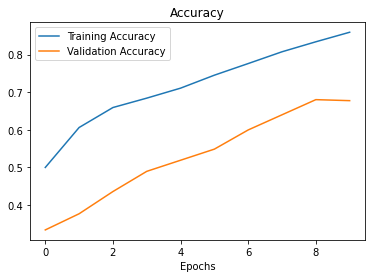

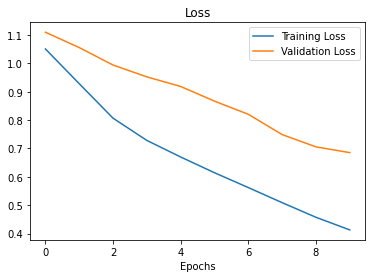

In [ ]:
# plot the losses
plot_model_history(history)

ماذا نستطيع ان نفسر من هذه الرسمتان ؟
 أول رسمة للدقه نستطيع ان نفسر ان بيانات التحقق لم تبلي جيداً وان التمرين يعمل بشكل جيد فقط على البيانات التي تمرن عليها ولكن لو تأتيه بيانات من خارج ماتعلمه سوف يجد صعوبه في تفسيرها

 ثاني رسمة: نستطيع ان نرى ان هامش الخطأ مرتفع بشكل كبير في التحقق عن التدريب وهذا يحدث عن تحدث مشكله فرط التخصيص	

```Overfitting فرط التخصيص	أو```

وتحدث عندما تتدرب الخوارزمية على نفس العينه بشكل كبير أو هنالك نقص في البيانات وهنا تحدث المشكله بحيث يصبح ضعيف معلوماتياً ويصعب عليه تصنيف الأشياء بدقات مختلفه وتشوهات مثلاً في الصور لايستطيع ان يفسرها.


### (Predictions on new data) التنبؤ بإستخدام بيانات جديدة
سوف نستعمل بيانات خارجية الان لكي نرى هل الخوارزمية التي دربناها كفوءة في تنبؤها أم لا ؟

In [ ]:
def prepare_image_from_path(filepath, img_shape=224):
    """
    Prepare image from Path and load it using TensorFlow I/O  and Return it into tensors,
    With reshaping the image to (224, 224, 3) in the end.

    ---------
    Args:
    filepath: the image path in your system
    img_shape: the shape of images that your model trained on. Default(224)
        E.g. if Changed to 300 ==> (300, 300, 3)
    
    Returns:
    tf image normalized
    """
    # Load the image 
    image = tf.io.read_file(filepath)

    # Decode the image from object I/O to tensors
    image = tf.image.decode_image(image, channels=3) # Channels=3 because the images has 3 channels just to make sure

    # Reshape image into desired output
    image = tf.image.resize(image, [img_shape, img_shape])

    # Cast it into dtype of float32
    image = tf.cast(image, dtype=tf.float32)

    return image/255.

tf.io.read_file():
- نستطيع من خلال هذه الداله أن نقرأ المسار للصوره وتحميلها الى مُتغير نستطيع استخدامه في التعديل او استخراج معلومات الصوره منه

tf.image.decode_image():
- تحويل الكائن الى تينسور وهي مصفوفه في TensorFlow 

tf.image.resize():
- نقوم بإعادة صياغة أبعاد الصوره لنفس الرقم الذي حولناه في أول مره قمنا بتحميل البيانات

tf.cast():
- تحويل المصفوفه الرقمية الى نوع tf.float32
    - كما ذكرت سابقاً ان الشبكة العصبية تعمل جيد مع هذا النوع

وفي اخر خطوة قمنا بجعل جميع القيم تتمحور مابين الرقمين 0 - 1

#### (Download new image from the wild) تحميل صوره من مصادر خارجية

In [ ]:
# Download scissor move for "rock paper scissor"
!wget https://i.imgur.com/PFwWPWO.png

--2022-08-04 07:41:32--  https://i.imgur.com/PFwWPWO.png
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49897 (49K) [image/png]
Saving to: ‘PFwWPWO.png’

PFwWPWO.png         100%[===================>]  48.73K  --.-KB/s    in 0.006s  

2022-08-04 07:41:32 (7.53 MB/s) - ‘PFwWPWO.png’ saved [49897/49897]



نقوم بتحميل الصوره لشخص اختار حركة المقص بيده, بعد تحميلها سوف نستخدم الداله التي قمنا بكتابها لكي نجهز الصورة وبعدها هنا نقطة مهمة جداً

tf.expand_dims():
- استعملناها لكي نعوض عن خانه Batch 
    - لأجل وضعها بالمكان الصحيح نقوم بوضع axis=0 
    - اي وضعها بالبدايه وهذا مايعنيه صفر

وهذه القيمة المُرجعة التي نريدها

```shape=(1, 224, 224, 3)```

In [ ]:
img = prepare_image_from_path("/content/PFwWPWO.png")
img = tf.expand_dims(img, axis=0)
img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dty

In [ ]:
# Make predictions with model
preds = model.predict(img)
preds

array([[0.7315165 , 0.05610512, 0.21237844]], dtype=float32)

الان نريد ان نجعل الخوارزمية التي دربناها للتو أن تتنبأ بالصورة الجديدة ماهي بعد ان نستعملها مع الصورة الجديدة نرى ان المخرجات منها هنالك 3 أرقام ماهي ؟

هذه الارقام الثلاثه هي نتيجة كل 3 من الحجر والورقة والمقص ونسبه الاحتمال العاليه منهم هو مايراه الكلاس الصحيح

In [ ]:
# Get the index of the highest predicted probability
preds.argmax()

0

argmax():
- نستطيع من خلالها ان نستخرج الانديكس لأعلى قيمة وهي القيمة التي سوف نستخدمها لاحقاً بداخل قائمة الكلاس التي استخرجناها في بدايه هذا الفصل

In [ ]:
# Get the label name from the prediction probability
class_names[preds.argmax()]

'rock'

لو وضعنا الكود الذي بالاعلى الخاص بالانديكس بداخل List

التي قمنا بإنشائها سوف نحصل على اسم الكلاس

الان سوف نجمعها في داله لكي نستخدمها كلما احتجناها

In [ ]:
# Functionize plotting & predictions
def plot_pred_image(model, filepath, class_names):
    """
    Plot the predicted image from the given filepath, Then using the trained model to get class probabilities,
    Then Label image with it's own title class

    ----------------
    Args:
    model: the trained model from TensorFlow.
    filepath: the location where the image resides
    class_names: List of class names that indicates what's the model trained on
    """
    # Prepare the image into tensors
    image = prepare_image_from_path(filepath)

    # make predictions with model
    preds = model.predict(tf.expand_dims(image, axis=0))

    # Get the label for the predicted class
    label = class_names[preds.argmax()]

    # Plot the image with label
    plt.imshow(image)
    plt.title(label)
    plt.axis(False);

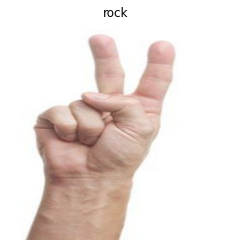

In [ ]:
plot_pred_image(model, "/content/PFwWPWO.png", class_names)

النتيجة النهائية للخوارزمية وتنبؤها بالصوره, لم يستطع ان يتعرف ويفسرها بالشكل الصحيح

ظهرت له انها حجر وهي مقص بالحقيقه, لا مشكله فهذه النتيجة تحدث من حيث لأخر...

ملاحظة: هنالك طرق لتحسين النتائج سوف اكتبها بالأقسام القادمة إن شاء الله

## (Load data from directory) إستخدام الصور بطريقه المجلدات
في هذا القسم من الفصل سوف نستخدم الطريقه التي ذكرت بأول الفصل ألا وهي أن تكون الصور لديك في مجلدات في النظام

ملاحظة: المجلدات التي تحوي الصور يجب ان تكون بصيغة معينه


### (Folders Structure) هيكل المجلدات
يجب إتباع هيكلية معينه للمجلدات لكي تعمل الدوال عندما نستعملها لاحقا

الشجرة الهيكلية للمجلدات يجب ان تكون:
```
Fruits_root <== المجلد الذي يحوي مجلدان Train + test 
└───train <== يحتوي على أسماء الكلاسات للصور للتدريب
│   └───acai <== مجلد أيضا هو بدوره يحوي الصور الخاصه به
│   │   │   images (1).jpeg
│   │   │   images (2).jpeg
│   │   │   ...      
│   └───cupuacu
│   │   │   images (1).jpeg
│   │   │   images (2).jpeg
│   │   │   ...
│   └───....
│   
└───test <== مجلد يحتوي على الكلاسات الخاصه للاختبار
│   └───acai <== مجلد أيضا هو بدوره يحوي الصور الخاصه به
│   │   │   images (1).jpeg
│   │   │   images (2).jpeg
│   │   │   ...      
│   └───cupuacu
│   │   │   images (1).jpeg
│   │   │   images (2).jpeg
│   │   │   ...
│   └───....
```

ملاحظة: ليس بالضرورة أن يحتوي المجلد على test

فمن الممكن أن يكون Validation

أو لايوجد أي مجلد عدا Train

### (Prepare images) تجهيز البيانات للمعالجة
الأن لدينا مجلد مضغوط ونريد فك الضغط لكي نرى المجلدات, بعدها نريد ان نقوم بتجهيز داله خاصه تقوم بتحميل جميع الصور من المجلدات الى كائن في الكود لكي نستطيع من بعدها معالجة الصور وغيرها من الخطوات السابقه التي ذكرناها كتحويل جميع قيم الصور من 0-255 إلى 0-1 الخ......


سوف اشرح طريقتين في تحميل الصور بإستخدام
- ImageDataGenerator
- image_dataset_from_directory 

وسوف يتم توضيح الميزه بينهما

In [ ]:
!wget https://github.com/Jo0xFF/tensorflow-in-arabic/raw/main/data/archive.zip

تحميل البيانات من مخزن قيت هب الخاص بالمشروع وتحميلها في الجهاز الخاص بك

In [ ]:
!unzip -q "/content/archive.zip"

نقوم بفك الضغط عن الديتا سواء بالكود المستعمل او بطريقة يدوية لاتوجد مشكله بكلا الطريقتين

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

TensorFlow من مكتبة ImageDataGenerator نقوم بإدراج

TensorFlow من مكتبة image_dataset_from_directory وأيضاً سوف نقوم بإدراج الدالة الاخرى 

#### ImageDataGenerator تجهيز البيانات بإستعمال 

In [ ]:
# Define train & test directories
TRAIN_DIR = "/content/ds_frutas_am/train"
TEST_DIR = "/content/ds_frutas_am/test"

# setup generators for each train & test
train_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255.)

# Preprocess the image data & batch it
train_data = train_gen.flow_from_directory(directory=TRAIN_DIR, # the directory where the images resides to load it
                                           target_size=(224, 224), # Convert all images to this shape (224, 224)
                                           class_mode="categorical", # which kind of problem you're classifying
                                           batch_size=32, # the number of batches 
                                           shuffle=True, # shuffle the data to prevent overfitting
                                           seed=1337) # for reproducability purpose

test_data = test_gen.flow_from_directory(TEST_DIR,
                                         target_size=(224, 224),
                                         class_mode="categorical",
                                         batch_size=32,
                                         seed=1337)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
train_data

ImageDataGenerator():
- rescale: هو باراميتر يتيح لنا من خلال هذا الكلاس ان نضع القيم خلال حد مابين 0-1

وهذه العملية تسمى Normalization

flow_from_directory(): عند إستخدام الكائن العائد من الكلاس نستطيع
- directory: وضع مسار حيث تتواجد ملفات التدريب
- target_size: تحديد أبعاد الصورة
- class_mode: ماهي نوع المشكلة التي نريد حلها ؟ طبقاً للبيانات التي نملكها نملك 6 كلاسات نريد تصنيفها لذلك المشكلة
(Categorical)
- batch_size: عدد الحزم التي يراها المودل خلال دورة واحدة من الـ Epochs
- shuffle: إعادة ترتيب الملفات بسبب التدريب ولكن لانضعها في الاختبار لكي لاتتسبب في مشكله اثناء التصنيف لاحقاً
- seed: لأجل الحصول على نفس النتيجة لاحقاً إذا اراد شخص تجريبها هذه الأكواد

في الخطوة القادمة سوف اشرح الطريقة الاخرى لتجهيز البيانات باستعمال دالة اخرى وليست مُولد بيانات

`Generator`

ويمكنك أختيار احدهما والخيار عائد إليك

#### image_dataset_from_directory تجهيز البيانات بإستعمال 

In [ ]:
# Define train & test directories
TRAIN_DIR = "/content/ds_frutas_am/train"
TEST_DIR = "/content/ds_frutas_am/test"

# setting up image shape & batch size
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

# Prepare data from directories
train_data = image_dataset_from_directory(directory=TRAIN_DIR, # the directory where the images resides to load it
                                          label_mode="categorical", # which kind of problem you're classifying
                                          image_size=IMAGE_SHAPE, # Convert all images to this shape (224, 224)
                                          batch_size=BATCH_SIZE, # the number of batches 
                                          shuffle=True, # shuffle the data to prevent overfitting
                                          seed=1337) # for reproducability purpose

test_data = image_dataset_from_directory(directory=TEST_DIR,
                                         label_mode="categorical",
                                         image_size=IMAGE_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         seed=1337)

Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


لاتختلف كثيراً عن الطريقة السابقة في تعريف بعض المُتغيرات وتتشابة ماعدا أن هنالك إختلاف بسيط بالمُسميات لكنها تؤدي نفس الغرض مثل
- directory: وضع مسار حيث تتواجد ملفات التدريب
- batch_size
- image_size
- seed
- label_mode ==>Class_mode المسمى اختلف كان بالمُولد يسمى

هذه جميعها تتبع نفس الشرح الذي في الخطوة السابقة لذلك لانحتاج إلى إعادة شرحها.

-------
الأن نعود إلى موضوع مالفرق بينهم إذا عندما ذكرت ذلك في بداية القسم لتجهيز البيانات

ImageDataGenerator: 
- السرعة: لو كان لدينا بيانات بحجم ضخم سوف تصبح العملية ابطأ أثناء عملية التدريب للخوارزمية وذلك راجع لسبب أنها تحصل عمليات إنشاء صور جديدة بألوان وأشكال وأحجام مختلفه حسب تعديلك لهذه المُتغيرات.
- Augmentation: يمكنك بكل سهولة إنشاء صور جديدة من نفس الصورة التي تعمل عليها لكي تمنع حدوث (فرط التخصيص) أو مايسمى ‏‪ Overfitting‬ 
    - للاستزادة بأنواع مختلفه منها يمكنك رؤية الموقع الرئيسي: [ImageDataGenerator Docs](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

image_dataset_from_directory:
- القيم مرجعة عبارة عن ‏‪ tf.data.Dataset object‬وهذا النوع الجديد بحد ذاته يعطي ميز كثيرة منها
    - السرعة في تجهيز البيانات وضخها بالخوارزمية prefetch يمكنك استعمال ‏‪والتي تتيح إستخدام tf.data.Dataset.from_tensor_slices()‬
- Augmentation: لاتوجد هذه الميزة فلذلك تضطر لإستعمال أحد الدوال المخصصة من  ‬‏‪لذلك لديك خيارين [Keras](https://keras.io/guides/preprocessing_layers/)
    - عمل ‏‪ Sequential model ‬وجمع فيه الدوال التي نريدها من اجل عمل توليد لصور جديدة من صورة واحدة, وهذا موجود في المستندات الخاصة في ‏‪ Keras ‬في الاعلى
    - في نفس المعمارية الاساسية نضع فقط لو اردنا ‏‪ Rescaling ‬فقط أو أي دالة أخرى

ملاحظة: الأن عرفنا بعض الفروقات لكن السؤال الأهم ماهي قيم الـ الكلاسات المُرجعة هل هي بصيغة ‏‪ integers‬أم انها بصيغة ‏‪وتم ذكر ذلك في قسم سابق OneHot

الجواب: هو انها تعود بصيغة ‏‪ `OneHot [0,0,1,0]`‬لطريقة ‏‪ image_dataset_from_directory ‬فقط

طريقة ‏‪ ImageDataGenerator‬تعود بصيغة اعداد طبيعية 0,1,2,3

##### طريقة إنشاء طبقة من الـ ‏‪ Data Augmentation using Sequential

In [ ]:
# How to make Augmentation layer
augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.RandomCrop(0.2, 0.2), 
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomTranslation(0.2, 0.1),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.1),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomContrast(0.1)
], name="augmentation_layer")

[Keras](https://keras.io/guides/preprocessing_layers/) هذه كلها موجودة في المستندات 

In [ ]:
# # Build the Sequential stack
# model_gen = tf.keras.Sequential([
#     augmentation_layer, # <========== ONLY THIS NEW!!
#     tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
#     tf.keras.layers.Conv2D(32, 3, activation="relu"),
#     tf.keras.layers.GlobalMaxPooling2D(),
#     tf.keras.layers.Dense(6, activation="softmax")
# ])

# model_gen.compile(loss="categorical_crossentropy",
#               optimizer="adam",
#               metrics=["accuracy"])

### (Prepare Classes) تجهيز الكلاسات

In [ ]:
# Get the Class names from the folder names
import pathlib
fruits_dir = pathlib.Path(TRAIN_DIR)
class_names = list(sorted(data.name for data in fruits_dir.glob("*")))
class_names

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

باستعمال مكتبه pathlib

نستطيع أن نسترجع أسماء الملفات في النظام وهي نفسها أسماء الكلاسات هنا لذلك وجدنا متغير الكلاسات وأيضاً رتبناها بسبب التنبؤ لاحقاً لكي تصبح النتائج مرتبه بشكل صحيح عند وضع تنبؤ الخوارزمية والكلاس المقابل لها هل أوجدها بشكل صحيح أم لا ؟

#### تجهيز الكلاسات بإستعمال كائن ‏‪ ImageDataGenerator

In [ ]:
train_data.class_indices

{'acai': 0,
 'cupuacu': 1,
 'graviola': 2,
 'guarana': 3,
 'pupunha': 4,
 'tucuma': 5}

نستطيع إستخراج أسماء وأرقام الكلاسات لو احتجنا للأرقام في أي مرحلة ما

#### تجهيز الكلاسات بإستعمال كائن ‏‪ tf.data.Dataset of Tensorflow

In [ ]:
train_data.class_names

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

نستطيع بهذه الطريقة أيضاً إستخراج أسماء الكلاسات التي حصلنا عليه عند تجهيز البيانات باستعمال الدوال التي في خطوة تجهيز الكلاسات

### (Building CNN model & Training) البدء في بناء الخوارزمية وتدريبها

In [ ]:
# Build the Sequential stack
model_gen = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(6, activation="softmax")
])

model_gen.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


فقط categorical_crossentropy التغير الوحيد هنا في الكود أن مقياس الـخطأ تغير الى 

التي كانت في البداية sparse من غير 

In [ ]:
# Train the model
history_gen = model_gen.fit(train_data,
                            epochs=10,
                            validation_data=test_data)

Epoch 1/10
3/3 [==============================] - 2s 776ms/step - loss: 1.8226 - accuracy: 0.1222 - val_loss: 1.7934 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 0s 128ms/step - loss: 1.7958 - accuracy: 0.1222 - val_loss: 1.7839 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 0s 122ms/step - loss: 1.7801 - accuracy: 0.2444 - val_loss: 1.7741 - val_accuracy: 0.3667
Epoch 4/10
3/3 [==============================] - 0s 123ms/step - loss: 1.7656 - accuracy: 0.2778 - val_loss: 1.7652 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 0s 123ms/step - loss: 1.7558 - accuracy: 0.3333 - val_loss: 1.7556 - val_accuracy: 0.4000
Epoch 6/10
3/3 [==============================] - 0s 133ms/step - loss: 1.7428 - accuracy: 0.4111 - val_loss: 1.7468 - val_accuracy: 0.3667
Epoch 7/10
3/3 [==============================] - 0s 119ms/step - loss: 1.7313 - accuracy: 0.4333 - val_loss: 1.7365 - val_accuracy: 0.3333
Epoch 8/10
3/3 [====

In [ ]:
# Evaluate it using test data
model_gen.evaluate(test_data)

1/1 [==============================] - 0s 102ms/step - loss: 1.6952 - accuracy: 0.5000


[1.695190191268921, 0.5]

هنا نرى ان نتيجة تدريب الخوارزمية ومقدرتها على التفريق بين 6 فواكة هو 50% تقريبا وهذا جيد الى حد ما

### (Plotting loss metrics) رسم مخططات بيانيه لكل من هوامش الخطأ

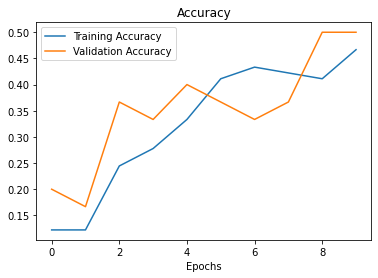

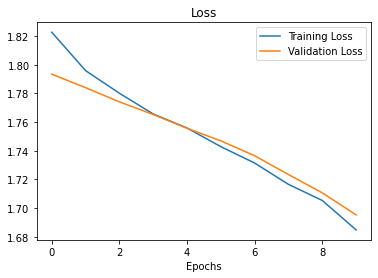

In [ ]:
# Plot the losses
plot_model_history(history_gen)

هنا نجد ان مقياس الدقه في التحقق كان أفضل من التدريب لكن عند نقطة ما اصبح اسوء وهذا يدل ان الخوارزمية في نقطة ما اصبحت لا تستطيع التمييز بين احد الفواكة

مقياس هامش الخطأ هنا مقارب جداً لهامش الخطأ الخاص بالتدريب ولكنه اصبح اعلى من الخط الازرق وهو التدريب لربما كما ذكرنا اصبح Overfitting

### (Predictions on new data) التنبؤ بإستخدام بيانات جديدة
فلنرى الأن هل الخوارزمية تدربت بشكل ممتاز ونرى النتائج بشكل بصري أكثر

In [ ]:
# Download image from external source
!wget "https://www.thespruceeats.com/thmb/t51g_Q0TMLbsLT51YhPIJgtwIP0=/2000x1333/filters:fill(auto,1)/GettyImages-162912489-584df2435f9b58a8cd096aaa.jpg"

--2022-08-04 08:01:01--  https://www.thespruceeats.com/thmb/t51g_Q0TMLbsLT51YhPIJgtwIP0=/2000x1333/filters:fill(auto,1)/GettyImages-162912489-584df2435f9b58a8cd096aaa.jpg
Resolving www.thespruceeats.com (www.thespruceeats.com)... 151.101.2.137, 151.101.66.137, 151.101.130.137, ...
Connecting to www.thespruceeats.com (www.thespruceeats.com)|151.101.2.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163721 (160K) [image/jpeg]
Saving to: ‘GettyImages-162912489-584df2435f9b58a8cd096aaa.jpg’

GettyImages-1629124 100%[===================>] 159.88K  --.-KB/s    in 0.02s   

2022-08-04 08:01:01 (8.07 MB/s) - ‘GettyImages-162912489-584df2435f9b58a8cd096aaa.jpg’ saved [163721/163721]



نقوم بتحميل صورة عشوائية من غوغل عن احد الفواكهة وهي acai

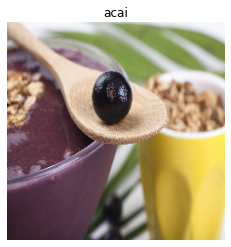

In [ ]:
# Try the predict the image
plot_pred_image(model_gen, "/content/GettyImages-162912489-584df2435f9b58a8cd096aaa.jpg", class_names)

النتيجة جميله جداً لقد استطاعت الخوارزمية فعلاً من التعرف على الفاكهة وتصنيفها

في مواضيع قادمة عن هذا الفصل سوف أقوم بكتابه كيفية تحسين الدقه وكيف التعامل مع بيانات تكون أحادية النتيجة بمعنى لو اردنا تصنيف شيء من قيمة واحدة

مثال: هل الصورة تفاحة أم برتقالة

لأن الامثله التي شرحت في هذا الفصل تُمثل تصنيف مشكله متعددة النتائج Multi Class classification

وبالتوفيق لكم جميعاً في رحلة التعلم وإنتظرونا في المواضيع والفصول القادمة بإذن الله